In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("all_GTR_G4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          2.0043 ( 1.6434,  2.4906) ( 1.6269,  2.4678)  0.8410 (Jnode 142)\n',
 't_n74          1.4116 ( 1.2321,  1.6436) ( 1.2167,  1.6167)  0.4000 (Jnode 141)\n',
 't_n75          0.8005 ( 0.7749,  0.8283) ( 0.7739,  0.8270)  0.0531 (Jnode 140)\n',
 't_n76          0.7497 ( 0.7306,  0.7694) ( 0.7299,  0.7686)  0.0387 (Jnode 139)\n',
 't_n77          0.6971 ( 0.6819,  0.7113) ( 0.6823,  0.7117)  0.0294 (Jnode 138)\n',
 't_n78          0.6885 ( 0.6737,  0.7021) ( 0.6744,  0.7026)  0.0282 (Jnode 137)\n',
 't_n79          0.6610 ( 0.6476,  0.6732) ( 0.6479,  0.6735)  0.0255 (Jnode 136)\n',
 't_n80          0.6071 ( 0.5951,  0.6184) ( 0.5954,  0.6186)  0.0232 (Jnode 135)\n',
 't_n81          0.5922 ( 0.5801,  0.6038) ( 0.5806,  0.6042)  0.0236 (Jnode 134)\n',
 't_n82          0.5478 ( 0.5323,  0.5620) ( 0.5323,  0.5619)  0.0296 (Jnode 133)\n',
 't_n83          0.4608 ( 0.4284,  0.4863) ( 0.4308,  0.4881)  0.0573 (Jnode 132)\n',
 't_n84          0.3713 ( 0.3312,  0.4070) ( 0.3327,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[2.0043,
 1.4116,
 0.8005,
 0.7497,
 0.6971,
 0.6885,
 0.661,
 0.6071,
 0.5922,
 0.5478,
 0.4608,
 0.3713,
 0.2005,
 0.1073,
 0.0531,
 0.0275,
 0.0129,
 0.1591,
 0.1494,
 0.1043,
 0.4109,
 0.3555,
 0.3181,
 0.0901,
 0.3192,
 0.4763,
 0.6483,
 0.6147,
 0.4022,
 0.3027,
 0.1819,
 0.1318,
 0.0405,
 0.1364,
 0.1039,
 0.0884,
 0.0741,
 0.0573,
 0.0422,
 0.2261,
 0.2009,
 0.1135,
 0.0927,
 0.0379,
 0.1823,
 0.1602,
 0.1751,
 0.5282,
 0.3512,
 0.6971,
 0.6802,
 0.6733,
 0.5189,
 0.1553,
 0.0794,
 0.4451,
 0.3767,
 0.6614,
 0.5737,
 0.549,
 0.4996,
 0.1857,
 0.0816,
 0.5858,
 0.5836,
 0.7855,
 0.6579,
 0.5683,
 0.6218,
 0.5626,
 0.4588]

In [7]:
lower_ci_iqtree

[1.6434,
 1.2321,
 0.7749,
 0.7306,
 0.6819,
 0.6737,
 0.6476,
 0.5951,
 0.5801,
 0.5323,
 0.4284,
 0.3312,
 0.1622,
 0.0832,
 0.0402,
 0.0205,
 0.0095,
 0.1274,
 0.1194,
 0.0823,
 0.3833,
 0.3271,
 0.2893,
 0.0725,
 0.2863,
 0.4568,
 0.6321,
 0.5959,
 0.3678,
 0.2732,
 0.159,
 0.1133,
 0.0323,
 0.1175,
 0.0885,
 0.0749,
 0.0624,
 0.0476,
 0.0347,
 0.1998,
 0.1764,
 0.0965,
 0.0783,
 0.0309,
 0.1404,
 0.1224,
 0.1345,
 0.489,
 0.2964,
 0.6828,
 0.6665,
 0.6598,
 0.477,
 0.118,
 0.0575,
 0.3978,
 0.3272,
 0.6482,
 0.5581,
 0.5324,
 0.48,
 0.1586,
 0.0638,
 0.5569,
 0.5537,
 0.7615,
 0.6225,
 0.5252,
 0.5687,
 0.4389,
 0.3514]

In [8]:
upper_ci_iqtree

[2.4906,
 1.6436,
 0.8283,
 0.7694,
 0.7113,
 0.7021,
 0.6732,
 0.6184,
 0.6038,
 0.562,
 0.4863,
 0.407,
 0.2445,
 0.1379,
 0.0703,
 0.037,
 0.0175,
 0.1968,
 0.1853,
 0.1328,
 0.4396,
 0.3849,
 0.348,
 0.1086,
 0.3528,
 0.4968,
 0.6615,
 0.6307,
 0.4345,
 0.331,
 0.2052,
 0.1519,
 0.0503,
 0.1562,
 0.1204,
 0.103,
 0.087,
 0.068,
 0.0506,
 0.2499,
 0.2228,
 0.1241,
 0.1009,
 0.0442,
 0.2142,
 0.1895,
 0.2061,
 0.5574,
 0.4057,
 0.7118,
 0.6942,
 0.6871,
 0.5506,
 0.193,
 0.1028,
 0.4826,
 0.4189,
 0.675,
 0.5877,
 0.5631,
 0.5146,
 0.2299,
 0.1068,
 0.6097,
 0.6094,
 0.8115,
 0.6903,
 0.6136,
 0.6662,
 0.6976,
 0.5651]

In [9]:
file_LG = open("all_calibrations_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

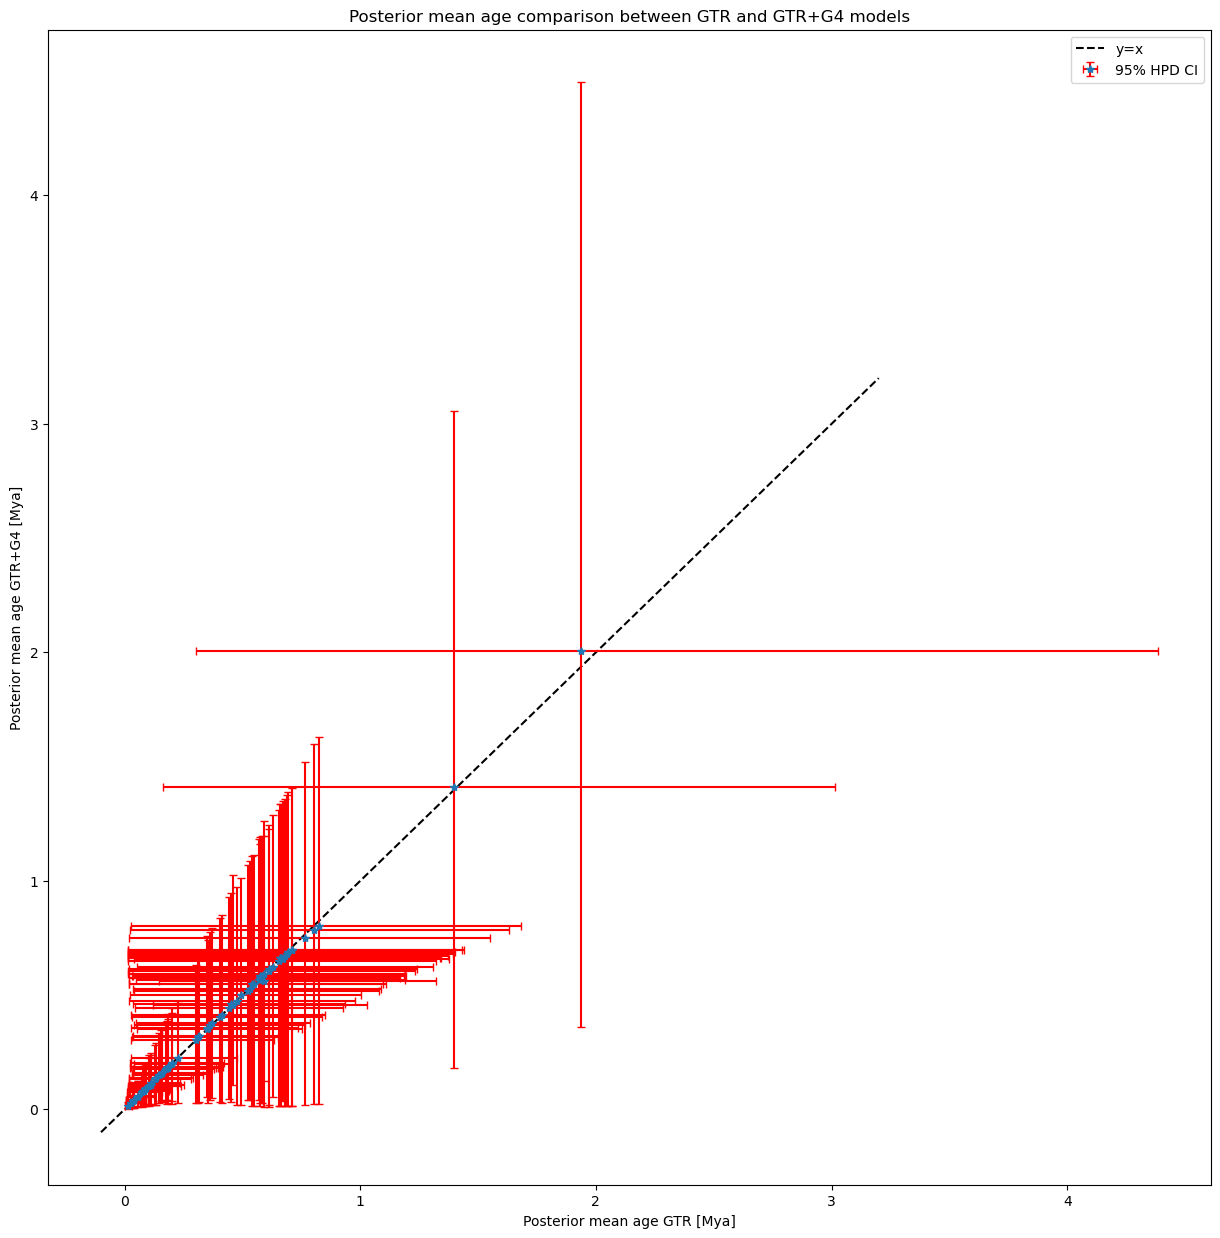

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./mammals_posterior_mean_age_comparison_GTR_G4.png')

In [11]:
posterior_mean_baseml

[1.9384,
 1.3964,
 0.8259,
 0.7656,
 0.7094,
 0.6954,
 0.6653,
 0.6112,
 0.59,
 0.5399,
 0.4536,
 0.3632,
 0.2034,
 0.1109,
 0.055,
 0.0284,
 0.0133,
 0.1601,
 0.1476,
 0.1048,
 0.4118,
 0.3535,
 0.3106,
 0.0865,
 0.3164,
 0.4775,
 0.6559,
 0.6145,
 0.4041,
 0.3026,
 0.1815,
 0.1312,
 0.0403,
 0.1355,
 0.1028,
 0.0872,
 0.0729,
 0.0564,
 0.0414,
 0.2257,
 0.1996,
 0.1128,
 0.0918,
 0.0374,
 0.1828,
 0.1596,
 0.174,
 0.5303,
 0.3497,
 0.7121,
 0.6903,
 0.679,
 0.5237,
 0.155,
 0.078,
 0.445,
 0.3711,
 0.6613,
 0.5757,
 0.5473,
 0.4935,
 0.1864,
 0.0809,
 0.5847,
 0.5763,
 0.8018,
 0.672,
 0.5713,
 0.6286,
 0.5914,
 0.462]

In [12]:
posterior_mean_iqtree

[2.0043,
 1.4116,
 0.8005,
 0.7497,
 0.6971,
 0.6885,
 0.661,
 0.6071,
 0.5922,
 0.5478,
 0.4608,
 0.3713,
 0.2005,
 0.1073,
 0.0531,
 0.0275,
 0.0129,
 0.1591,
 0.1494,
 0.1043,
 0.4109,
 0.3555,
 0.3181,
 0.0901,
 0.3192,
 0.4763,
 0.6483,
 0.6147,
 0.4022,
 0.3027,
 0.1819,
 0.1318,
 0.0405,
 0.1364,
 0.1039,
 0.0884,
 0.0741,
 0.0573,
 0.0422,
 0.2261,
 0.2009,
 0.1135,
 0.0927,
 0.0379,
 0.1823,
 0.1602,
 0.1751,
 0.5282,
 0.3512,
 0.6971,
 0.6802,
 0.6733,
 0.5189,
 0.1553,
 0.0794,
 0.4451,
 0.3767,
 0.6614,
 0.5737,
 0.549,
 0.4996,
 0.1857,
 0.0816,
 0.5858,
 0.5836,
 0.7855,
 0.6579,
 0.5683,
 0.6218,
 0.5626,
 0.4588]

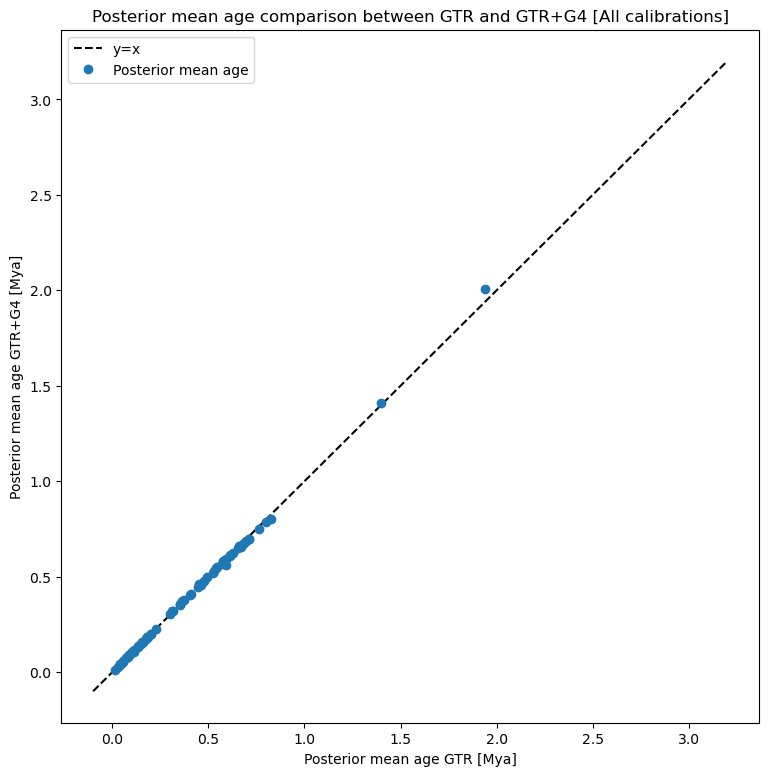

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./mammals_posterior_mean_age_comparison_GTR_G4_scatter.png')

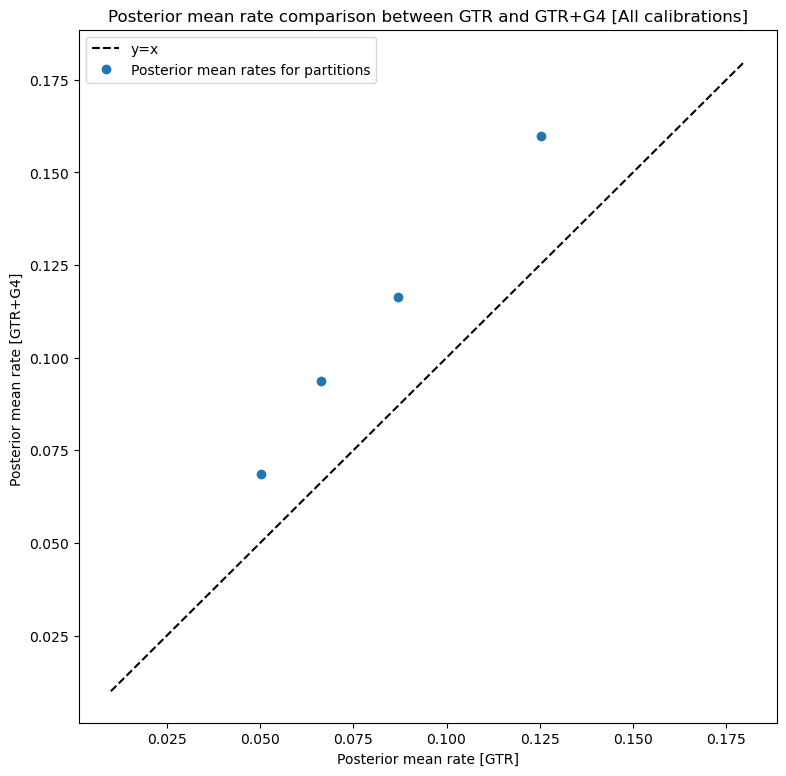

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+G4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+G4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./mammals_posterior_mean_rate_comparison_GTR_G4_all_scatter.png')